# visualizations: ggplot

# setup

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotnine
from plotnine import *

In [3]:
%matplotlib inline

In [4]:
df_iris = sns.load_dataset("iris")
df_tips = sns.load_dataset("tips")
df_fmri = sns.load_dataset("fmri")

# ggplot (plotnine)

In [5]:
# reference: https://github.com/empathy87/storytelling-with-data

In [6]:
# reference: https://plotnine.readthedocs.io/en/stable/
# reference: https://github.com/has2k1/plotnine
# reference: https://www.datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python/
# reference: https://ggplot2.tidyverse.org/reference/theme.html
# reference: https://ggplot2.tidyverse.org/reference/

In [7]:
# note: use matplotlib for titles due to bugs in plotnine with plotting outside of plot area\
# reference: https://github.com/has2k1/plotnine/issues/290

In [8]:
# colors
custom_colors = {
    "GRAY_1" : "#231F20",
    "GRAY_2" : "#414040",
    "GRAY_3" : "#555655",
    "GRAY_4" : "#646369",
    "GRAY_5" : "#76787B",
    "GRAY_6" : "#828282",
    "GRAY_7" : "#929497",
    "GRAY_8" : "#A6A6A5",
    "GRAY_9" : "#BFBEBE",
    "BLUE_1" : "#174A7E",
    "BLUE_2" : "#4A81BF",
    "BLUE_3" : "#94B2D7",
    "BLUE_4" : "#94AFC5",
    "RED_1" : "#C3514E",
    "RED_2" : "#E6BAB7",
    "GREEN_1" : "#0C8040",
    "GREEN_2" : "#9ABB59",
    "ORANGE_1" : "#F79747",
    "PURPLE_1" : "#663399",
    "BLACK" : "#000000",
}

In [9]:
# matplotlib settings
custom_rc= {
    # Arial 
    "font.family" : "Arial",
    "mathtext.fontset" : "custom",
    "mathtext.bf" : "Arial:bold",
    "mathtext.it" : "Arial:italic",
    # Helvetica (note: there is a bug with bold weight)
    #"font.family" : "Helvetica Neue",
    #"mathtext.fontset" : "custom",
    #"mathtext.bf" : "Helvetica Neue:bold",
    #"mathtext.it" : "Helvetica Neue:italic",
}
for each in custom_rc:
    matplotlib.rcParams[each] = custom_rc[each]

In [10]:
# figure size and aspect ratio
golden_ratio = (1 + np.sqrt(5)) / 2
width = 8.8
height = width / golden_ratio
plotnine.options.figure_size = (width, height)
# fonts
font_size = 12
font_larger_size = 13
subtitle_font_size = 14
title_font_size = 22
font_family = "Arial"
# colors
custom_font_axes_labels_color = custom_colors["GRAY_4"]
custom_title_color = custom_colors["GRAY_3"]
custom_subtitle_color = custom_colors["GRAY_3"]
color_cycle = [
    custom_colors["BLUE_1"],
    custom_colors["GREEN_1"],
    custom_colors["RED_1"],
    custom_colors["ORANGE_1"],
    custom_colors["PURPLE_1"],
]
color_cycle_2 = [
    custom_colors["GRAY_5"],
    custom_colors["GRAY_6"],
    custom_colors["GRAY_7"],
    custom_colors["GRAY_8"],
    custom_colors["GRAY_9"],
]

In [11]:
custom_theme = (theme_classic(base_size=font_size, base_family=font_family)
+ theme(panel_border=element_blank(),
        # background
        plot_background=element_rect(color='white'),
        plot_margin=None,
        # axis and ticks
        axis_line=element_line(color=custom_font_axes_labels_color, size=.5),
        axis_ticks=element_line(color=custom_font_axes_labels_color, size=.5),
        axis_text=element_text(color=custom_font_axes_labels_color, size=font_size,
                               family=font_family, margin={'t': 5, 'r': 5}),
        axis_title=element_text(color=custom_font_axes_labels_color, size=font_larger_size,
                                family=font_family, margin={'t': 6, 'r': 7}),
        axis_ticks_length_major=3,
        axis_ticks_length_minor=1.5,
        # title
        title=element_text(color=custom_title_color, size=title_font_size, family=font_family),
        # text
        text=element_text(color=custom_font_axes_labels_color, size=font_size, family=font_family),
        # grid
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_grid_major_x=element_blank(),
        panel_grid_major_y=element_blank(),
        panel_grid_minor_x=element_blank(),
        panel_grid_minor_y=element_blank(),
        # legend
        legend_key=element_blank(),
        legend_text=element_text(color=custom_font_axes_labels_color, size=font_size,
                                 family=font_family, fontweight="normal", margin={'l': 8}),
        legend_title=element_text(color=custom_font_axes_labels_color, size=font_size, 
                                  family=font_family, fontweight="bold", margin={'b': 10}),
       )
)

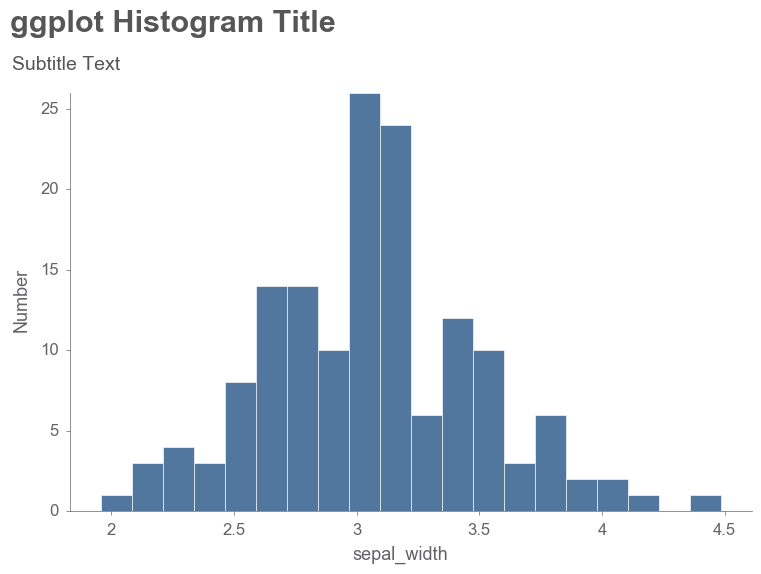

In [12]:
# histogram
figure = (ggplot(data=df_iris, mapping=aes(x='sepal_width'))
 + geom_histogram(bins=20, size=0.25, fill=custom_colors["BLUE_1"], 
                  color="white", alpha=0.75)
 + scale_x_continuous(minor_breaks=[]) 
 + scale_y_continuous(minor_breaks=[], expand=(0,0)) 
 + labs(x = "sepal_width", y = "Number") 
 + custom_theme
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.057, .992, "ggplot Histogram Title", fontweight="bold", 
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.059, .922, "Subtitle Text", 
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

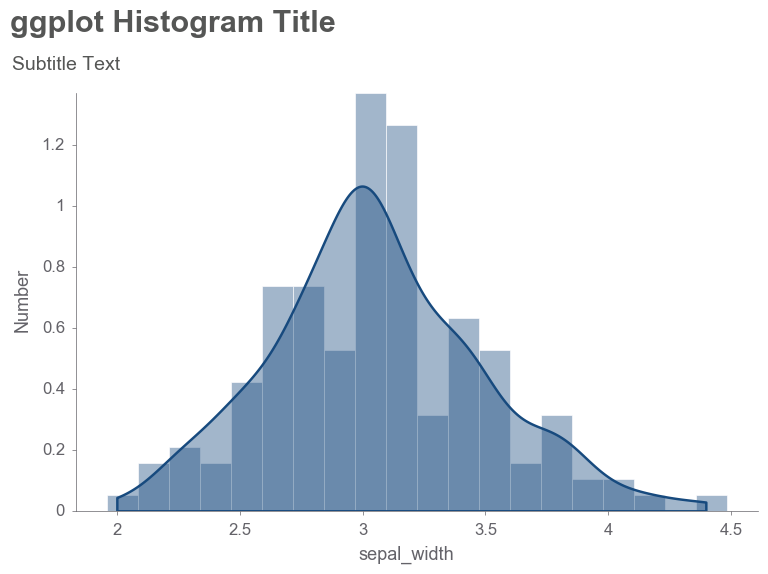

In [13]:
# histogram
figure = (ggplot(data=df_iris, mapping=aes(x='sepal_width'))
 + geom_histogram(aes(y='stat(density)'), bins=20, size=0.25, 
                  fill=custom_colors["BLUE_1"], color="white", alpha=0.4)
 + geom_density(color=custom_colors["BLUE_1"], fill=custom_colors["BLUE_1"],
                alpha=0.4, size=1)
 + scale_x_continuous(minor_breaks=[]) 
 + scale_y_continuous(breaks=np.arange(0,2,0.2), minor_breaks=[], expand=(0,0)) 
 + labs(x = "sepal_width", y = "Number") 
 + custom_theme
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.05, .992, "ggplot Histogram Title", fontweight="bold", 
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.052, .922, "Subtitle Text", 
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

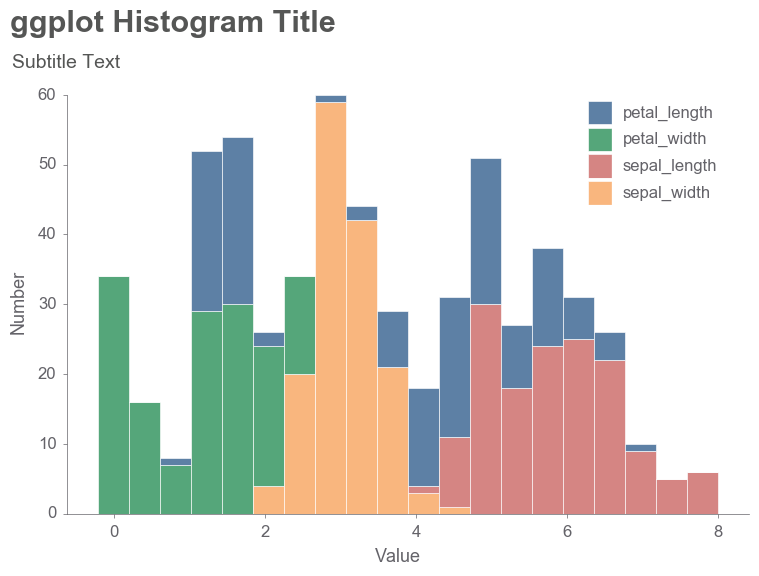

In [14]:
# data
df_iris_melt = df_iris.melt(value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_iris_melt.columns = ['Feature','Value']
# histogram
figure = (ggplot(data=df_iris_melt, mapping=aes(x='Value', fill='Feature'))
 + geom_histogram(bins=20, size=0.25, color="white", alpha=0.7) 
 + scale_fill_manual(color_cycle)
 + scale_x_continuous(breaks=np.arange(0,10,2), minor_breaks=[])
 + scale_y_continuous(minor_breaks=[], expand=(0,0)) 
 + labs(x = "Value", y = "Number", fill = "")
 + custom_theme
 + theme(legend_position = (.79,.8))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.06, .996, "ggplot Histogram Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.062, .93, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

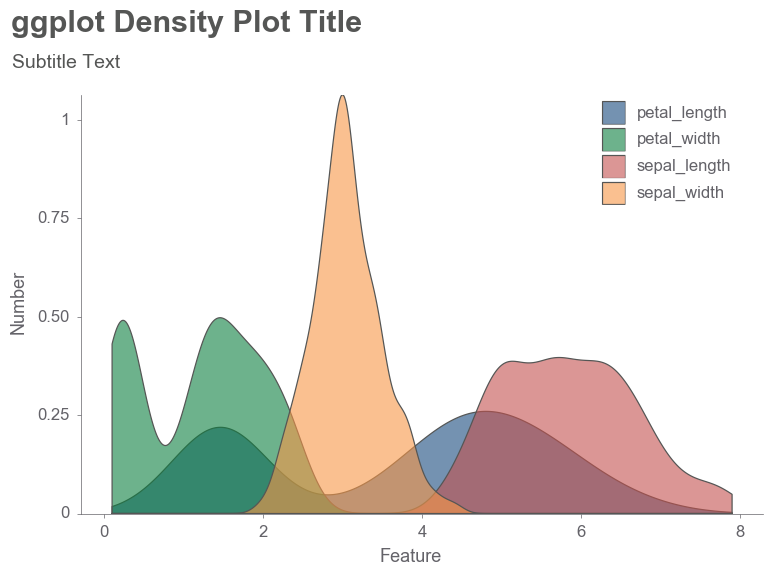

In [15]:
# data
df_iris_melt = df_iris.melt(value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_iris_melt.columns = ['Feature','Value']
# histogram
figure = (ggplot(data=df_iris_melt, mapping=aes(x='Value', fill='Feature'))
 + geom_density(alpha=0.6, color=custom_colors["GRAY_3"]) 
 + scale_fill_manual(color_cycle)
 + scale_x_continuous(breaks=np.arange(0,10,2), minor_breaks=[])
 + scale_y_continuous(minor_breaks=[], expand=(0, 0)) 
 + labs(x = "Feature", y = "Number", fill = " ")
 + custom_theme
 + theme(legend_position = (.79,.8))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.045, .996, "ggplot Density Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.047, .93, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

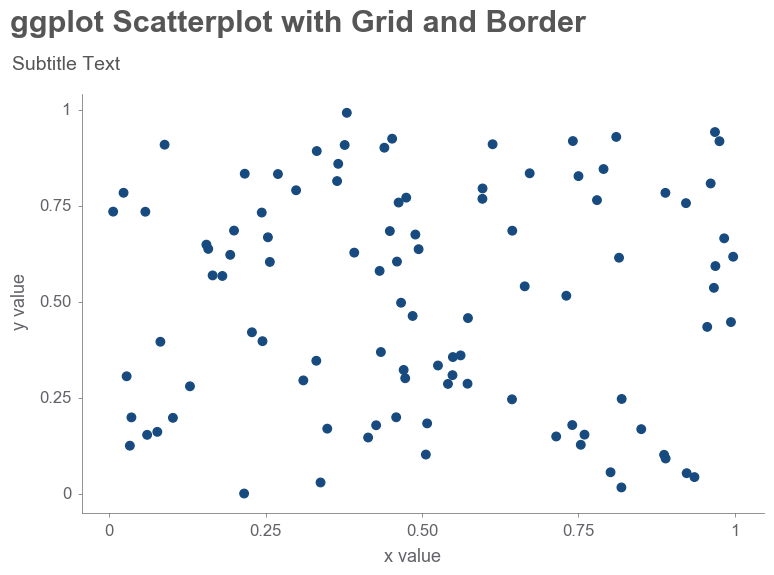

In [16]:
# data
df = pd.DataFrame({'x' : np.random.random(100),
                   'y' : np.random.random(100)})
figure = (ggplot(data=df, mapping=aes(x='x', y='y'))
 + geom_point(color=custom_colors["BLUE_1"], size=3)
 + scale_x_continuous(minor_breaks=[])
 + scale_y_continuous(minor_breaks=[])
 + custom_theme
 + labs(x="x value", y="y value")
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.043, .995, "ggplot Scatterplot with Grid and Border", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.045, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

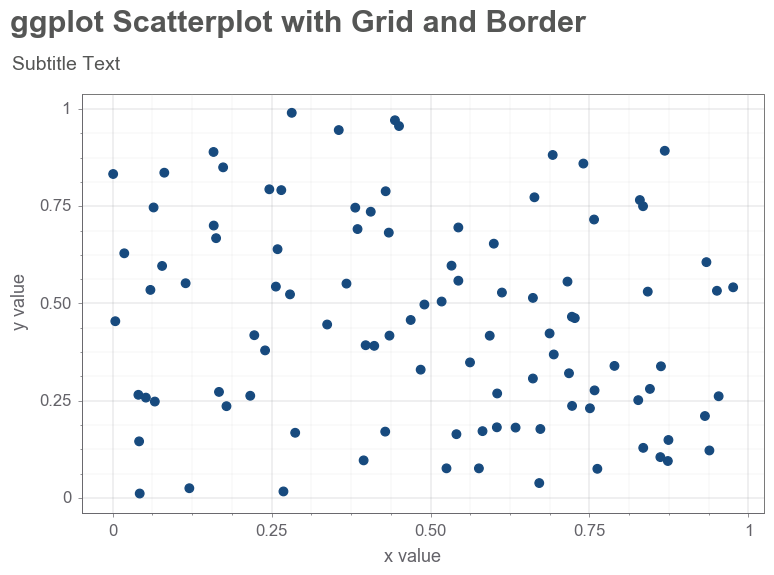

In [17]:
# data
df = pd.DataFrame({'x' : np.random.random(100),
                   'y' : np.random.random(100)})
figure = (ggplot(data=df, mapping=aes(x='x', y='y'))
 + geom_point(color=custom_colors["BLUE_1"], size=3)
 + scale_x_continuous(breaks=np.arange(0,1.25,0.25),
                      minor_breaks=np.arange(0,1,0.25/4))
 + scale_y_continuous(breaks=np.arange(0,1.25,0.25),
                      minor_breaks=np.arange(0,1,0.25/4))
 + custom_theme
 + labs(x="x value", y="y value")
 + theme(panel_grid_major=element_line(color=custom_colors["GRAY_7"], size=.2),
         panel_grid_minor=element_line(color=custom_colors["GRAY_9"], size=.1),
         panel_border = element_rect(color=custom_colors["GRAY_2"], size=.5))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.043, .995, "ggplot Scatterplot with Grid and Border", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.045, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

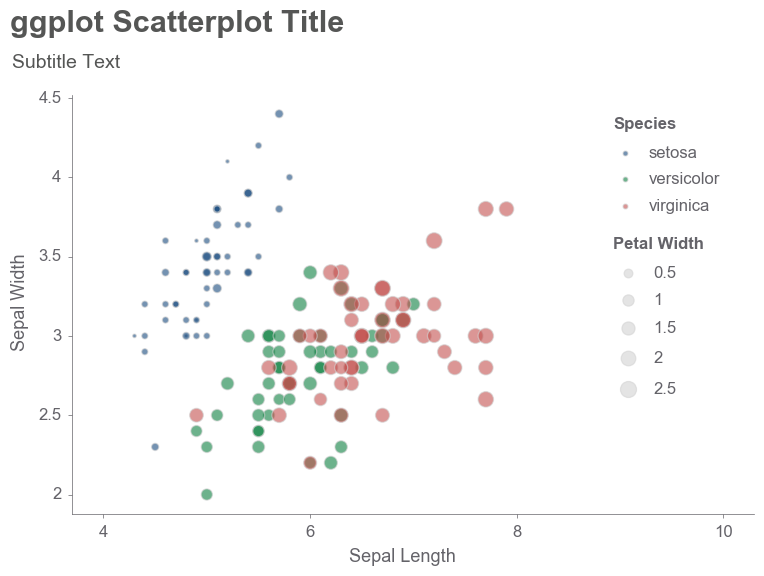

In [18]:
# scatterplot
figure = (ggplot(data=df_iris, mapping=aes(x='sepal_length', y='sepal_width', 
                                           fill='species', size='petal_width'))
 + scale_fill_manual(color_cycle)
 + geom_point(alpha=0.6, color='lightgray') 
 + scale_x_continuous(limits=(4,10), minor_breaks=[])
 + scale_y_continuous(minor_breaks=[]) 
 + labs(x = "Sepal Length", y = "Sepal Width", fill="Species", size="Petal Width")
 + custom_theme
 + theme(legend_position = (.8,.58), legend_box_just = "left" )
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.054, .996, "ggplot Scatterplot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.056, .93, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

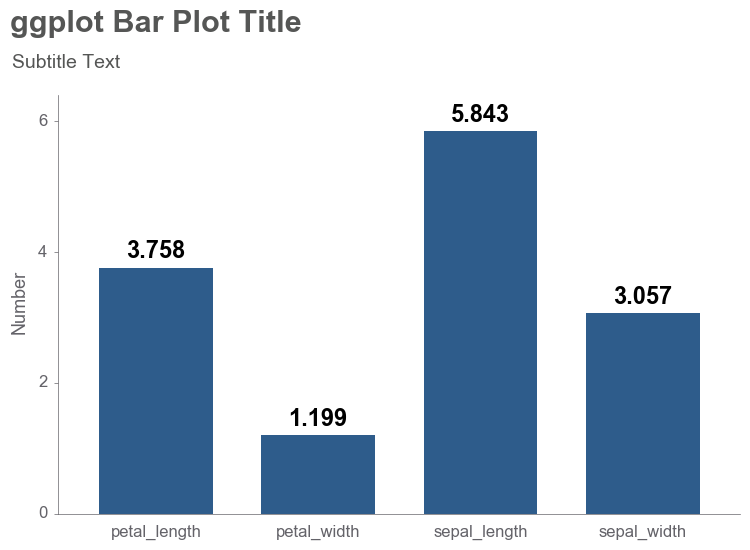

In [19]:
# data
bar_data = pd.DataFrame(df_iris.mean())
bar_data["Feature"] = bar_data.index
bar_data.reset_index(drop=True, inplace=True)
bar_data.columns = ["Value", "Feature"]
# bar
figure = (ggplot(data=bar_data, mapping=aes(x='Feature', y='Value'))
 + geom_col(fill=custom_colors["BLUE_1"], alpha=0.9, width=0.7)
 + geom_text(aes(label='Value'), color="black", nudge_x=0, nudge_y=.25, fontweight="bold",
             size=17, va='center', ha='center', format_string='{:.3f}')
 + scale_y_continuous(minor_breaks=[], expand=(0,0,.05,0)) 
 + labs(x = "", y = "Number")
 + custom_theme
 + theme(axis_ticks_major_x=element_blank())
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.07, .996, "ggplot Bar Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.072, .93, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

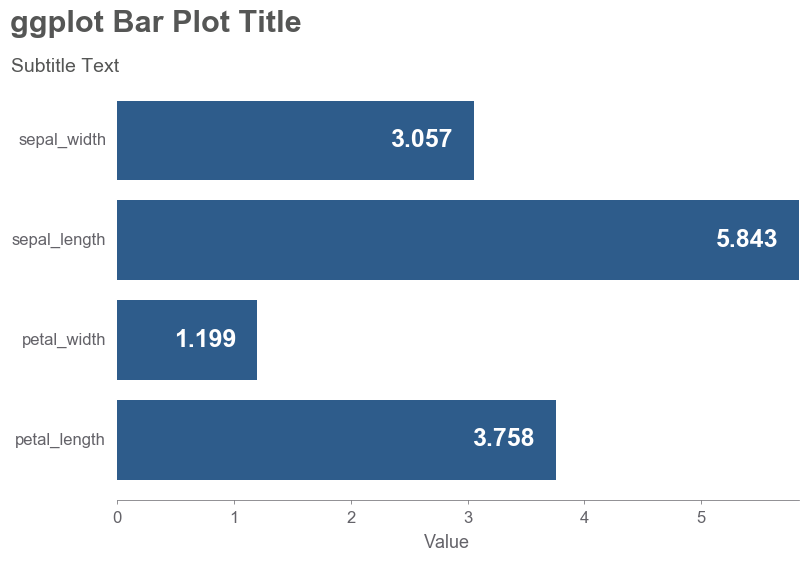

In [20]:
# data
bar_data = pd.DataFrame(df_iris.mean())
bar_data["Feature"] = bar_data.index
bar_data.reset_index(drop=True, inplace=True)
bar_data.columns = ["Value", "Feature"]
# bar 
figure = (ggplot(data=bar_data, mapping=aes(x='Feature', y='Value'))
 + geom_col(fill=custom_colors["BLUE_1"], alpha=0.9, width=0.8)
 + geom_text(aes(label='Value'), color="white", nudge_x=0, nudge_y=-.45, fontweight="bold",
             size=18, va='center', ha='center', format_string='{:.3f}')
 + scale_y_continuous(minor_breaks=[], expand=(0,0)) 
 + labs(x = "", y = "Value")
 + coord_flip()
 + custom_theme 
 + theme(axis_ticks_major_y=element_blank(), 
         axis_line_y=element_blank())
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.003, .97, "ggplot Bar Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.004, .897, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

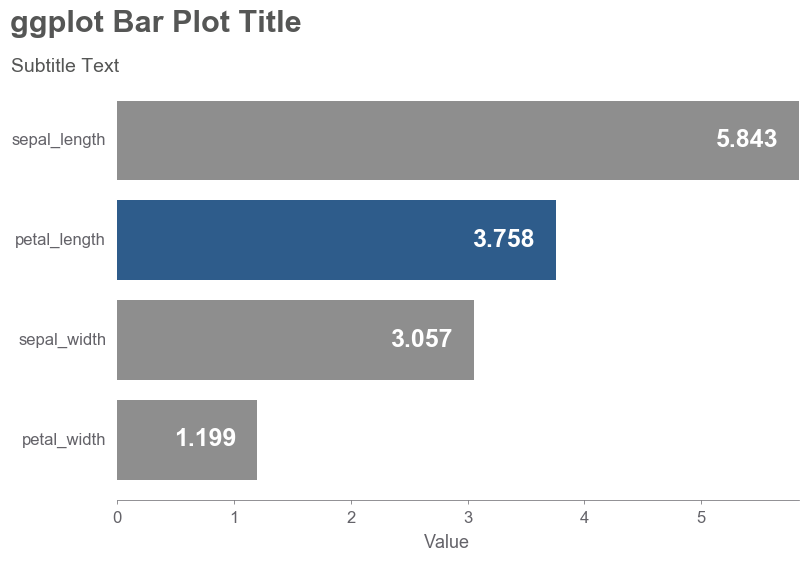

In [21]:
# data
bar_data = pd.DataFrame(df_iris.mean())
bar_data["Feature"] = bar_data.index
bar_data.reset_index(drop=True, inplace=True)
bar_data.columns = ["Value", "Feature"]
bar_data.sort_values(by="Value", ascending=True, inplace=True)
# workaround for sorting bar in plot
bar_data_cateorgies_order = list(bar_data['Feature'])
bar_data_ordered = bar_data.copy()
bar_data_ordered['Feature'] = pd.Categorical(bar_data_ordered['Feature'], 
                                    categories=bar_data_cateorgies_order, 
                                    ordered=True)
# bar
colors = [custom_colors['GRAY_6']] * 2 + [custom_colors['BLUE_1']] + [custom_colors['GRAY_6']] 
figure = (ggplot(data=bar_data_ordered, mapping=aes(x='Feature', y='Value', fill='Feature'))
 + geom_col(alpha=0.9, width=0.8)
 + scale_fill_manual(colors)
 + geom_text(aes(label='Value'), color="white", nudge_x=0, nudge_y=-.45, fontweight='bold',
             size=18, va='center', ha='center', format_string='{:.3f}')
 + scale_y_continuous(minor_breaks=[], expand=(0,0)) 
 + labs(x = "", y = "Value")
 + coord_flip()
 + custom_theme 
 + theme(axis_ticks_major_y=element_blank(), 
         axis_line_y=element_blank(),
         legend_position = "none")
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.003, .97, "ggplot Bar Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.004, .897, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

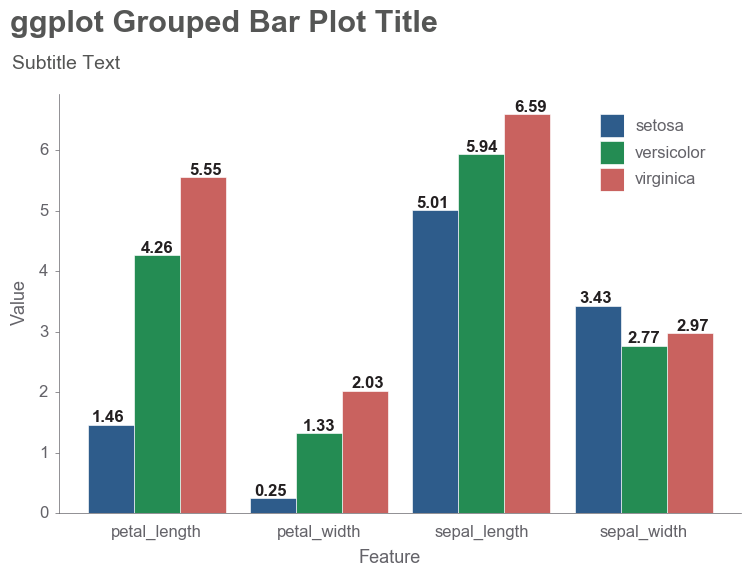

In [22]:
# data
bar_data = df_iris.groupby("species").mean()
bar_data["species"] = bar_data.index
bar_data.reset_index(drop=True, inplace=True)
bar_data_melt = bar_data.melt(id_vars=['species'], 
                              value_vars=['sepal_length', 'sepal_width','petal_length', 'petal_width'])
bar_data_melt.columns = ["Species","Feature","Value"]
# grouped bar
figure = (ggplot(data=bar_data_melt, mapping=aes(x='Feature', y='Value', fill="Species"))
 + geom_col(alpha=0.9, width=0.85, position="dodge", color="white", size=0.25)
 + scale_fill_manual(color_cycle)
 + geom_text(aes(label='Value', group="Species"), position=position_dodge(width=.9), va="bottom",
             color=custom_colors["GRAY_1"], fontweight="bold", size=12, format_string='{:.2f}')
 + scale_y_continuous(breaks=np.arange(0,8,1), minor_breaks=[], expand=(0,0,.05,0)) 
 + labs(x = "Feature", y = "Value", fill="")
 + custom_theme
 + theme(legend_position = (.8,.8), 
         legend_box_just = "left" ,
         axis_ticks_major_x=element_blank())
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.069, .996, "ggplot Grouped Bar Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.071, .928, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

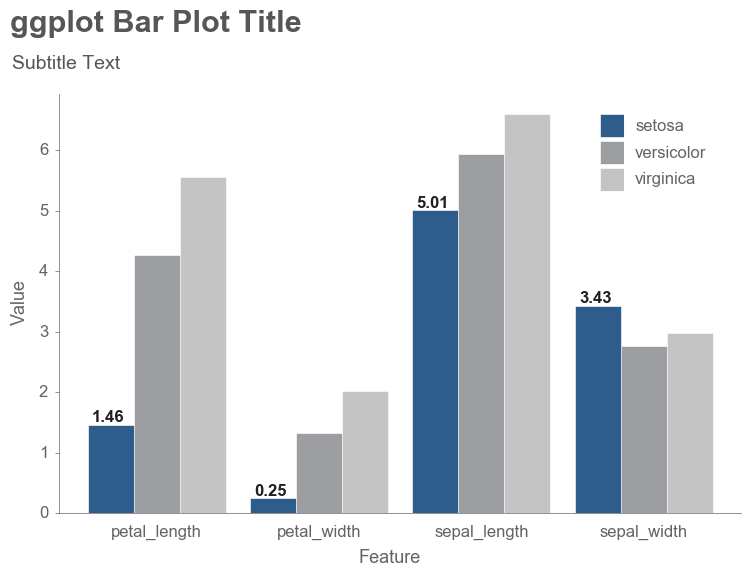

In [23]:
# data
bar_data = df_iris.groupby("species").mean()
bar_data["species"] = bar_data.index
bar_data.reset_index(drop=True, inplace=True)
bar_data_melt = bar_data.melt(id_vars=['species'], 
                              value_vars=['sepal_length', 'sepal_width','petal_length', 'petal_width'])
bar_data_melt.columns = ["Species","Feature","Value"]
# grouped bar
colors = [custom_colors['BLUE_1'], custom_colors['GRAY_7'], custom_colors['GRAY_9']]
text_colors = [custom_colors["GRAY_1"], 'white', 'white']
figure = (ggplot(data=bar_data_melt, mapping=aes(x='Feature', y='Value', fill="Species", color="Species"))
 + geom_col(alpha=0.9, width=0.85, position="dodge", color="white", size=0.25)
 + scale_fill_manual(colors)
 + geom_text(aes(label='Value', group="Species"), position=position_dodge(width=.9), va="bottom",
             ha="center", fontweight="bold", size=12, format_string='{:.2f}', show_legend = False)
 + scale_color_manual(text_colors)
 + scale_y_continuous(breaks=np.arange(0,8,1), minor_breaks=[], expand=(0,0,.05,0)) 
 + labs(x = "Feature", y = "Value", fill="")
 + custom_theme
 + theme(legend_position = (.8,.8), 
         legend_box_just = "left" ,
         axis_ticks_major_x=element_blank())
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.069, .996, "ggplot Bar Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.071, .928, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

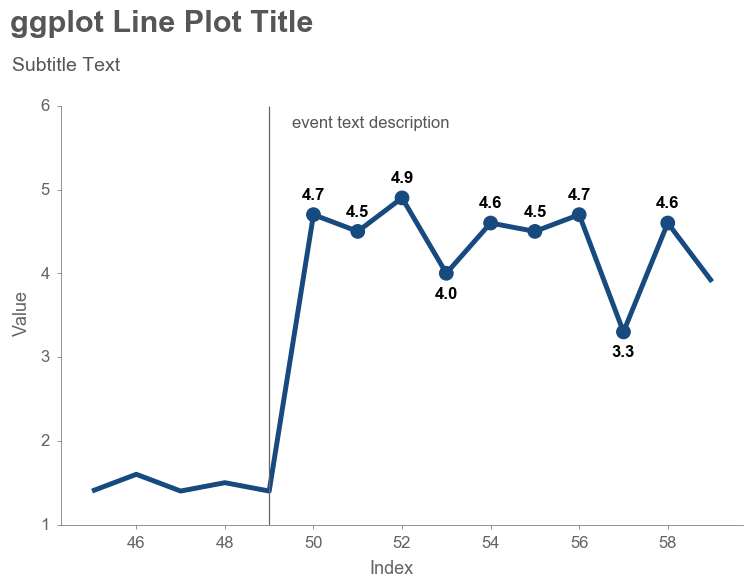

In [24]:
# data
df_iris_line = pd.DataFrame({'Index' : range(0,len(df_iris["petal_length"])),
                             'Value' : df_iris['petal_length']})
df_iris_line_subset = df_iris_line[(df_iris_line["Index"] > 44) & (df_iris_line["Index"] < 60)]
# line
figure = (ggplot(data=df_iris_line_subset, mapping=aes(x='Index', y='Value'))
 + geom_point(alpha=1, color=custom_colors["BLUE_1"], size=5,
              data=df_iris_line_subset[df_iris_line_subset["Index"].isin(range(50, 59))])
 + geom_line(alpha=1, color=custom_colors["BLUE_1"], size=2)
 + geom_vline(xintercept=49, color=custom_font_axes_labels_color, size=.5)
 + geom_text(aes(label="Value"), nudge_y=.24, size=12, fontweight='bold',
             data=df_iris_line_subset[df_iris_line_subset["Index"].isin([50,51,52,54,55,56,58])])
 + geom_text(aes(label="Value"), nudge_y=-.24, size=12, fontweight='bold',
             data=df_iris_line_subset[df_iris_line_subset["Index"].isin([53,57])])
 + annotate(geom="text", x=51.3, y=5.8, size=12, fontweight='normal', family="Arial",
             label="event text description", color=custom_colors['GRAY_3'])
 + scale_x_continuous(breaks=np.arange(44,60,2), minor_breaks=[])
 + scale_y_continuous(breaks=np.arange(1,7,1), minor_breaks=[], limits=(1,6), expand=(0,0))
 + labs(x = "Index", y = "Value")
 + custom_theme
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.067, 1.017, "ggplot Line Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.069, .945, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

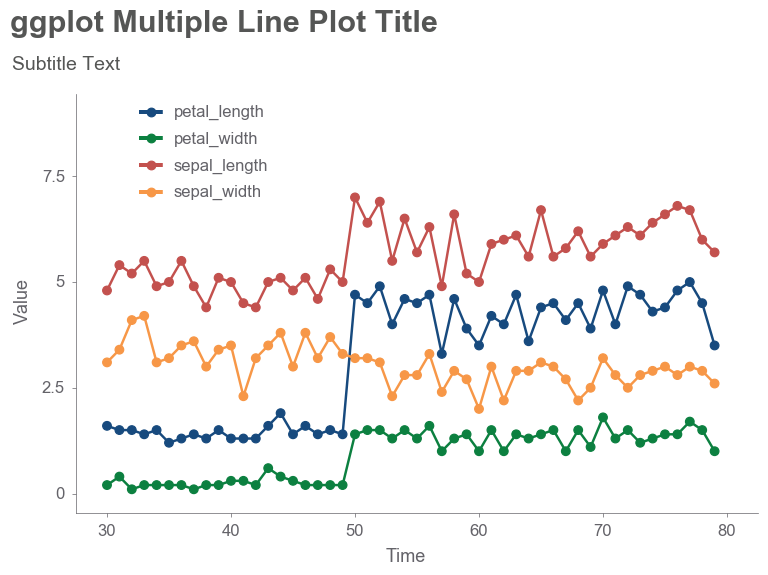

In [25]:
# data
df_iris_subset = df_iris.iloc[30:80]
df_iris_melt = df_iris_subset.reset_index().melt(id_vars=["index"], 
                           value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"])
# multiline
figure = (ggplot(data=df_iris_melt, mapping=aes(x='index', y='value', color="variable"))
 + geom_point(alpha=1, size=3)
 + geom_line(alpha=1, size=1)
 + scale_color_manual(color_cycle)
 + scale_x_continuous(minor_breaks=[], limits=(30,80))
 + scale_y_continuous(minor_breaks=[], limits=(0,9))
 + labs(x = "Time", y = "Value", color = "")
 + custom_theme
 + theme(legend_position = (.27,.8))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.05, .995, "ggplot Multiple Line Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.052, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

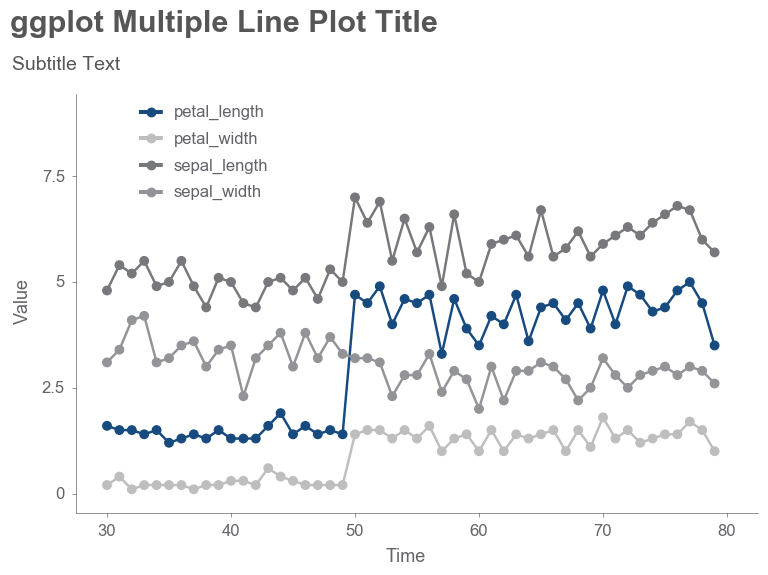

In [26]:
# data
df_iris_subset = df_iris.iloc[30:80]
df_iris_melt = df_iris_subset.reset_index().melt(id_vars=["index"], 
                           value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"])
# multiline
colors = [custom_colors["BLUE_1"], custom_colors["GRAY_9"], custom_colors["GRAY_5"], custom_colors["GRAY_7"]]
figure = (ggplot(data=df_iris_melt, mapping=aes(x='index', y='value', color="variable"))
 + geom_point(alpha=1, size=3)
 + geom_line(alpha=1, size=1)
 + scale_color_manual(colors)
 + scale_x_continuous(minor_breaks=[], limits=(30,80))
 + scale_y_continuous(minor_breaks=[], limits=(0,9))
 + labs(x = "Time", y = "Value", color = "")
 + custom_theme
 + theme(legend_position = (.27,.8))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.05, .995, "ggplot Multiple Line Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.052, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

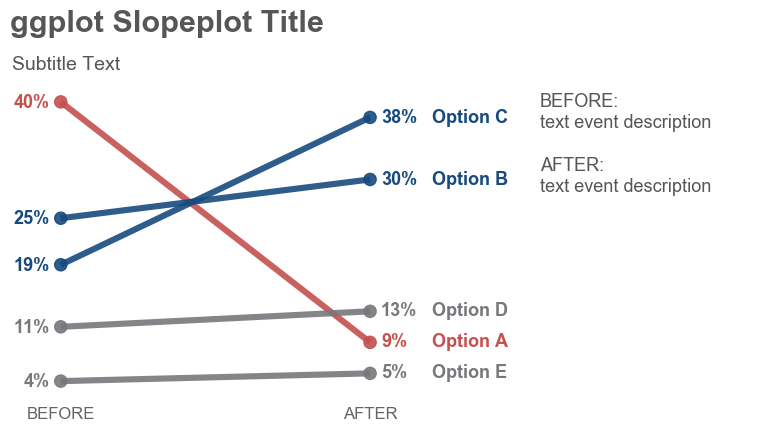

In [27]:
# data
raw_data = [[40,9],[25,30],[19,38],[11,13],[4,5]]
processed_data = pd.DataFrame()
for each_index, each_data in enumerate(raw_data):
    each_df = pd.DataFrame(each_data).reset_index()
    each_df['LABEL'] = chr(ord('@')+each_index+1)
    each_df.columns = ["TIME","VALUE","LABEL"]
    processed_data = pd.concat([processed_data, each_df]).reset_index(drop=True)
# slopeplot
colors=[custom_colors['RED_1']] + [custom_colors['BLUE_1']]*2 + [custom_colors['GRAY_5']]*2
figure = (ggplot(data=processed_data, mapping=aes(x='TIME', y='VALUE', color="LABEL"))
 + geom_point(alpha=0.9, size=4.5)
 + geom_line(alpha=0.9, size=2.5)
# left
 + geom_text(aes(label="VALUE"), ha='right', nudge_y=-.1, nudge_x=-.035, 
             format_string="{}%", size=font_larger_size, fontweight='bold',
             data=processed_data[processed_data['TIME'] == 0])
# right
 + geom_text(aes(label="VALUE"), ha='left', nudge_y=0, nudge_x=.035, 
             format_string="{}%", size=font_larger_size, fontweight='bold',
             data=processed_data[processed_data['TIME'] == 1])
 + geom_text(aes(label="LABEL"), ha='left', nudge_y=0, nudge_x=.2, 
             format_string="Option {}", size=font_larger_size, fontweight='bold',
             data=processed_data[processed_data['TIME'] == 1])
 + scale_color_manual(colors)
 + scale_x_continuous(breaks=[0,1], minor_breaks=[], 
                      labels=["BEFORE", "AFTER"], limits=(-.05,2))
 + scale_y_continuous(breaks=[], minor_breaks=[])
 + labs(x = "", y = "", color = "")
 + custom_theme
 + theme(legend_position = "none",
         figure_size=(9,4),
         axis_ticks_major_x=element_blank(),
         axis_ticks_major_y=element_blank(), 
         axis_line_x=element_blank(),
         axis_line_y=element_blank())
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.121, 1.02, "ggplot Slopeplot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.123, 0.925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.figtext(.71, 0.78, "BEFORE:\ntext event description          ", 
         fontsize=font_larger_size, color=custom_subtitle_color)
plt.figtext(.71, 0.62, "AFTER:\ntext event description          ", 
         fontsize=font_larger_size, color=custom_subtitle_color)
plt.show()
plt.close()

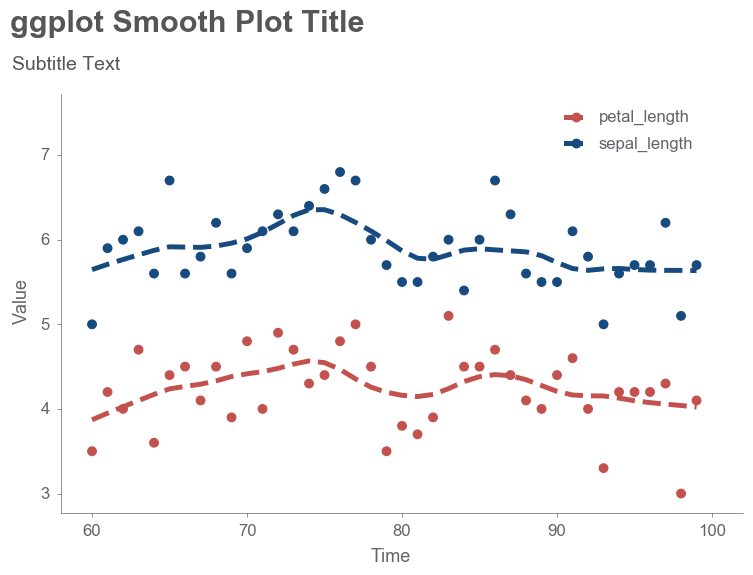

In [28]:
# data
df_iris_subset = df_iris.iloc[60:100]
df_iris_melt = df_iris_subset.reset_index().melt(id_vars=['index'], 
    value_vars=['petal_length','sepal_length'])
# smoothing
figure = (ggplot(data=df_iris_melt, mapping=aes(x='index', y='value', color="variable"))
 + geom_point(alpha=1, size=3)
 + geom_smooth(span=.3, se=False, size=2, linetype = "dashed")
 + scale_color_manual([custom_colors["RED_1"], custom_colors["BLUE_1"]])
 + scale_x_continuous(minor_breaks=[], limits=(60,100))
 + scale_y_continuous(minor_breaks=[], limits=(3,7.5))
 + labs(x = "Time", y = "Value", color = "")
 + custom_theme
 + theme(legend_position = (.77,.84))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.067, .995, "ggplot Smooth Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.069, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

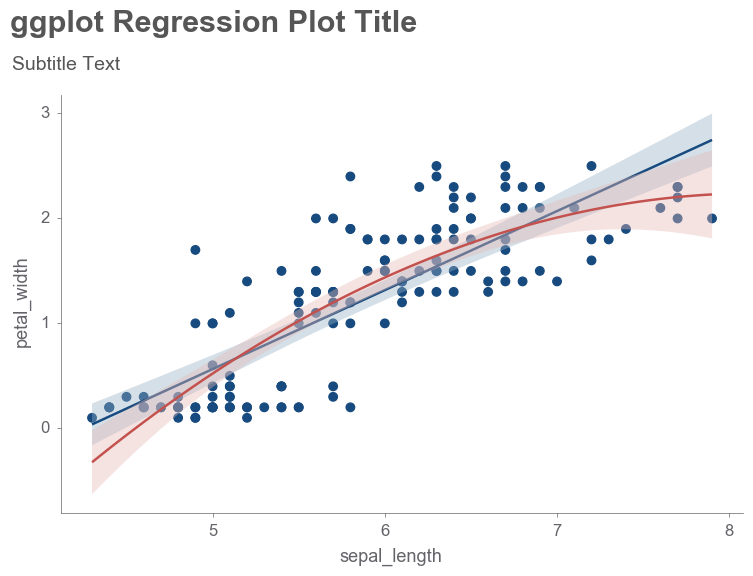

In [29]:
# polyregression function 
def poly(x, degree=1):
    d = {}
    for i in range(degree+1):
        if i == 1:
            d['x'] = x
        else:
            d[f'x**{i}'] = np.power(x, i)
    return pd.DataFrame(d)
# smoothing
figure = (ggplot(data=df_iris, mapping=aes(x='sepal_length', y='petal_width'))
 + geom_point(alpha=1, size=3, color=custom_colors["BLUE_1"])
 + geom_smooth(method='lm', fill=custom_colors["BLUE_4"], color=custom_colors["BLUE_1"], level=.99)
 + stat_smooth(method='lm', formula='y ~ poly(x, degree=2)', 
               color=custom_colors["RED_1"], fill=custom_colors["RED_2"], se=True, level=.99)
 + scale_x_continuous(minor_breaks=[])
 + scale_y_continuous(minor_breaks=[])
 + labs(x = "sepal_length", y = "petal_width")
 + custom_theme
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.067, .995, "ggplot Regression Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.069, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

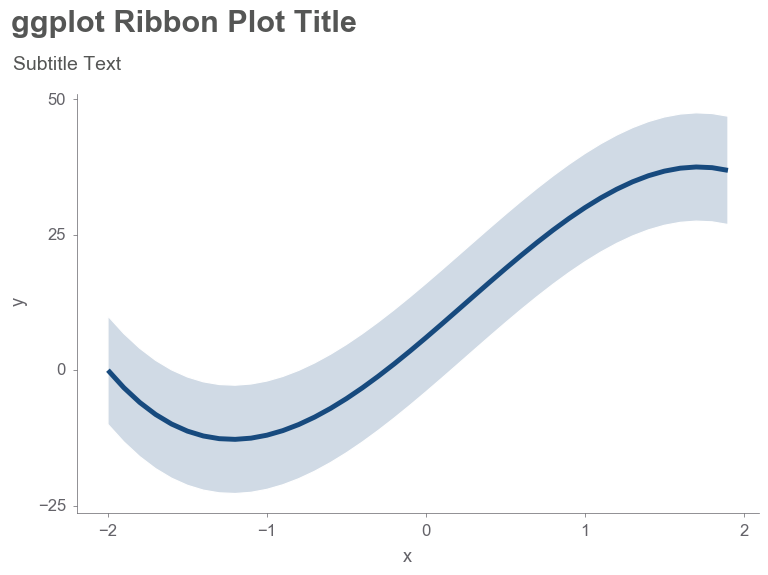

In [30]:
# data
x = np.arange(-2,2,.1)
y = -4*x**3 + 3*x**2 + 25*x + 6
ymax = y + 10
ymin = y - 10
df = pd.DataFrame({'x' : x, 'y' : y, 'ymax' : ymax, 'ymin' : ymin})
# ribbon
figure = (ggplot(data=df, mapping=aes(x='x', y='y'))
 + geom_ribbon(aes(ymin ='ymin', ymax = 'ymax'), fill=custom_colors["BLUE_1"],
               color="white", alpha=0.2)
 + geom_line(size=2, color=custom_colors["BLUE_1"])
 + scale_x_continuous(minor_breaks=[])
 + scale_y_continuous(minor_breaks=[])
 + labs(x = "x", y = "y")
 + custom_theme
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.05, .995, "ggplot Ribbon Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.052, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

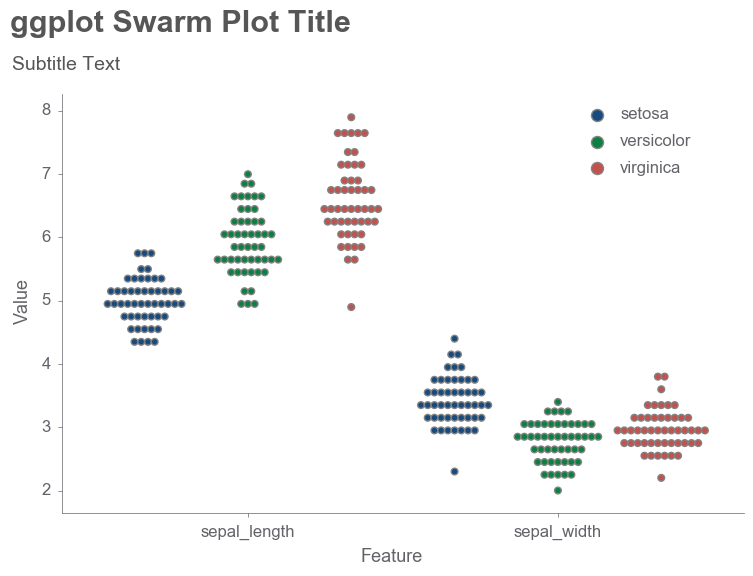

In [31]:
# data
df_iris_melt = df_iris.melt(id_vars=['species'], 
                            value_vars=["sepal_length", "sepal_width"])
df_iris_melt.columns = ["Species", "Feature", "Value"]
# boxplot
figure = (ggplot(data=df_iris_melt, mapping=aes(x='Feature', y='Value', color='Species', fill='Species'))
 + stat_bindot(binaxis = "y", color=custom_colors["GRAY_6"], stackdir='center',
              position=position_dodge(1), dotsize=0.9, bins=50)
 + scale_color_manual(color_cycle)
 + scale_fill_manual(color_cycle)
 + scale_y_continuous(breaks=np.arange(0,9,1), minor_breaks=[])
 + labs(x = "Feature", y = "Value", color="", fill="")
 + custom_theme
 + theme(legend_position = (.78,.82))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.066, .995, "ggplot Swarm Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.068, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

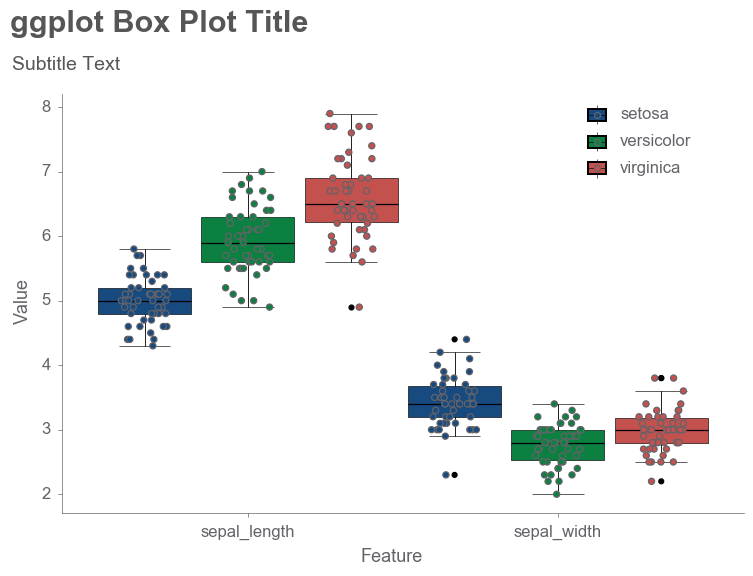

In [32]:
# data
df_iris_melt = df_iris.melt(id_vars=['species'], 
                            value_vars=["sepal_length", "sepal_width"])
df_iris_melt.columns = ["Species", "Feature", "Value"]
# boxplot
figure = (ggplot(data=df_iris_melt, mapping=aes(x='Feature', y='Value', color='Species', fill='Species'))
 + stat_boxplot(geom ='errorbar', position=position_dodge(width=1), 
                size=.25, width=.5, color="black") 
 + geom_boxplot(color="black", size=.25, notch=False, width=1, alpha=1)
 + geom_jitter(position=position_jitterdodge(0.15,0,1), color=custom_colors["GRAY_4"], size=2)
 + scale_color_manual(color_cycle)
 + scale_fill_manual(color_cycle)
 + scale_y_continuous(breaks=np.arange(0,9,1), minor_breaks=[])
 + labs(x = "Feature", y = "Value", color="", fill="")
 + custom_theme
 + theme(legend_position = (.78,.82))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.066, .995, "ggplot Box Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.068, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

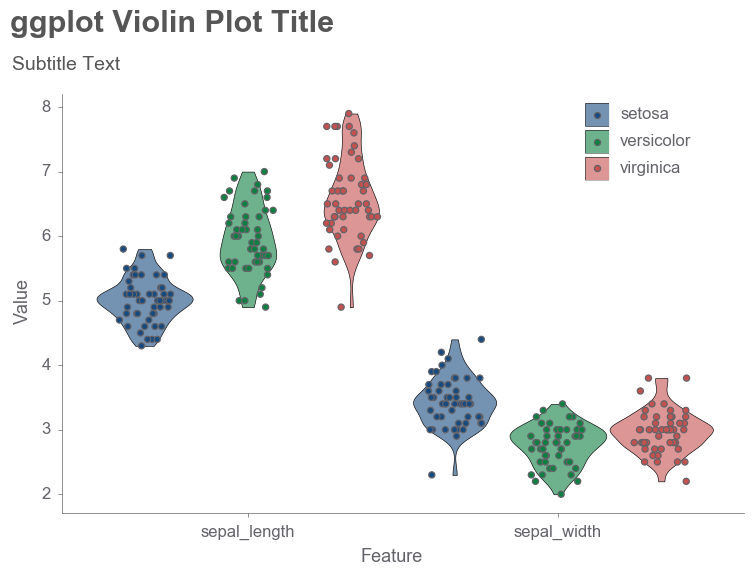

In [33]:
# data
df_iris_melt = df_iris.melt(id_vars=['species'], 
                            value_vars=["sepal_length", "sepal_width"])
df_iris_melt.columns = ["Species", "Feature", "Value"]
# boxplot
figure = (ggplot(data=df_iris_melt, mapping=aes(x='Feature', y='Value', color='Species', fill='Species'))
 + geom_violin(color="black", size=.25, width=1, alpha=.6)
 + geom_jitter(position=position_jitterdodge(0.175,0,1), color=custom_colors["GRAY_4"], size=2)
 + scale_color_manual(color_cycle)
 + scale_fill_manual(color_cycle)
 + scale_y_continuous(breaks=np.arange(0,9,1), minor_breaks=[])
 + labs(x = "Feature", y = "Value", color="", fill="")
 + custom_theme
 + theme(legend_position = (.78,.82))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(0.066, .995, "ggplot Violin Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(0.068, .925, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

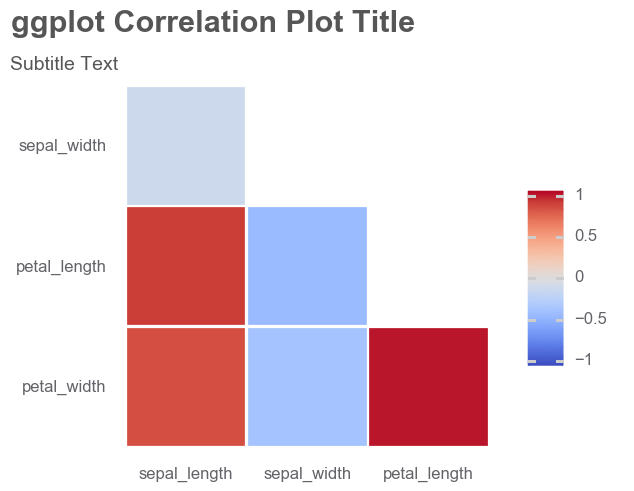

In [34]:
# data
df_heatmap = df_iris.corr()
df_heatmap = df_heatmap.replace(1, np.NaN)
df_heatmap = df_heatmap.where(np.triu(np.ones(df_heatmap.shape)).astype(np.bool))
df_heatmap_melt = df_heatmap.reset_index().melt(id_vars=['index'], 
    value_vars=["sepal_length", "sepal_width", "petal_length","petal_width"])
df_heatmap_melt.columns = ['variable_x', 'variable_y', 'value']
df_heatmap_melt = df_heatmap_melt[df_heatmap_melt['value'].notnull()]
# workaround for feature order in plot
category_order = list(df_heatmap.index)[::-1]
df_heatmap_melt_ordered = df_heatmap_melt.copy()
df_heatmap_melt_ordered['variable_x'] = pd.Categorical(df_heatmap_melt_ordered['variable_x'], 
                                                       categories=category_order[::-1], ordered=True)
df_heatmap_melt_ordered['variable_y'] = pd.Categorical(df_heatmap_melt_ordered['variable_y'], 
                                                       categories=category_order, ordered=True)
# heatmap
figure = (ggplot(data=df_heatmap_melt_ordered, 
                 mapping=aes(x='variable_x', y='variable_y', fill='value'))
 + geom_tile(aes(width=.98, height=.98), color="white")
 + scale_fill_continuous("coolwarm", limits=[-1,1])
 + labs(x = "", y = "", fill="")
 + custom_theme
 + theme(axis_line=element_blank(),
         axis_ticks=element_blank(),
         axis_text=element_text(margin={'t': 2, 'r': 2}),
         figure_size=(5,5))
)
# add text
ax = figure.draw().get_axes()
plt.figtext(-.08, .965, "ggplot Correlation Plot Title", fontweight="bold",
            fontsize=title_font_size, color=custom_title_color)
plt.figtext(-.082, .89, "Subtitle Text",
            fontsize=subtitle_font_size, color=custom_subtitle_color)
plt.show()
plt.close()

In [35]:
# note: plotnine does not support subplots, use matplotlib/seaborn instead 